In [1]:
import espresso_machine as esma

In [2]:
model = esma.project(project_id='Fe')

In [3]:
model.get_structure(format='poscar')
model.set_pseudo("US")
model.set_cores(8)
model.ecutwfc(60) #Set wavefunction cutoff
model.k_points(6) #Set number of k points
model.degauss(0.05) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.set_pseudo("US")
model.ecutrho(360)  

In [4]:
model.calculate('vc-relax')
model.get_structure('vc-relax')
model.calculate('scf')

vc-relax is finished
scf is finished


In [5]:
path = ['GAMMA','H','P','GAMMA','N','P','N','H'] #define corners
num_points = 20 #number of points
model.band_points(path,num_points) #define path

bands is finished
bands-pp is finished


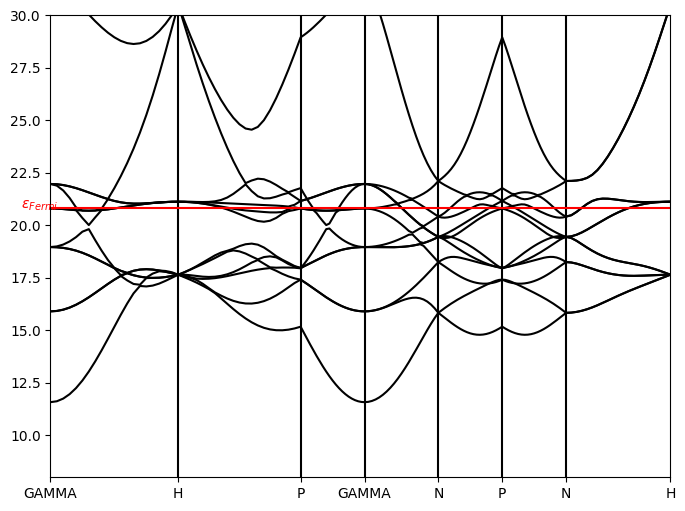

In [6]:
model.calculate('bands')
model.plot('electron',ylim=[8,30]) #plot electron bands

In [7]:
models = model.magnetize(magnetic_atom='Fe')

bands is finished
bands-pp is finished
bands is finished
bands-pp is finished


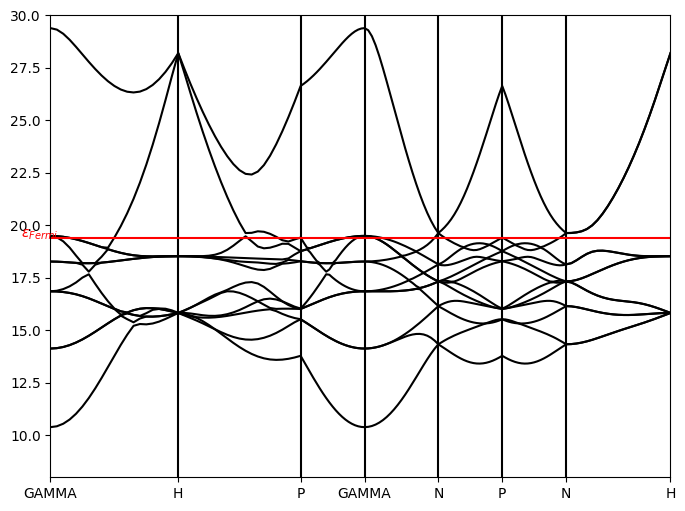

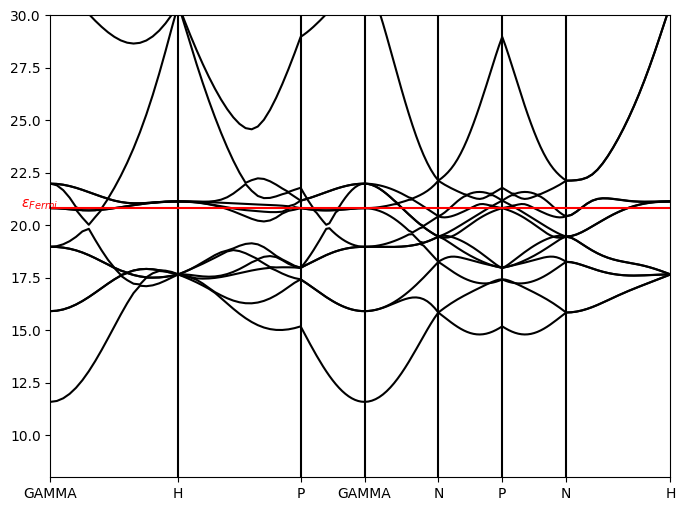

In [8]:
for state in models:
    state.get_structure('vc-relax')
    state.calculate('bands')
    state.plot('electron',ylim=[8,30]) #plot electron bands